# PyTorch Datasets and DataLoaders
This demo covers PyTorch Datasets and DataLoaders. We will pickup and cover the topics from the video. 

# PyTorch Datasets

### PyTorch Pre-loaded Datasets
Let's begin by covering "pre-loaded" Datasets in PyTorch

These are perfect for beginning working with Datasets or for research/experimentation.

Pre-loaded Datasets available: Image, Text and Audio

In [ ]:
# Let's begin with Pre-loaded Audio files
# Import torchaudio 
import torchaudio.datasets

# To get a list of available Audio Datasets go to Documentation URL: https://pytorch.org/audio/stable/datasets.html

In [50]:
# Create a dataset using DR_VCTK (Device Recorded VCTK https://pytorch.org/audio/stable/references.html#id42)
import os
os.makedirs("audio", exist_ok=True)
audio_dataset = torchaudio.datasets.DR_VCTK(root='./audio', subset='test', download=True) 


In [ ]:
print("Number of samples:", len(audio_dataset))

Number of samples: 824


In [ ]:
# Lets do a pre-loaded image dataset
# Import the torchvision datasets library
import torchvision.datasets
from torchvision.transforms import ToTensor

In [51]:
# Create a dataset from the FashionMNIST classification dataset 
image_dataset = torchvision.datasets.FashionMNIST(root='./fashion', train=False, download=True, transform=ToTensor())

# NOTE: Ignore the transform for now. Tensors are required. 

In [ ]:
# Let's print the Classes of a dataset 
print(image_dataset.classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
# Print the classes to their indexes 
print(image_dataset.class_to_idx)

# This is an attribute used to map class names to integer values because models require integer values for training


{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


In [ ]:
# Reverse the class to index mapping for plotting
class_to_index_map = image_dataset.class_to_idx
index_to_class_map = {v: k for k, v in class_to_index_map.items()}
print(index_to_class_map)

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


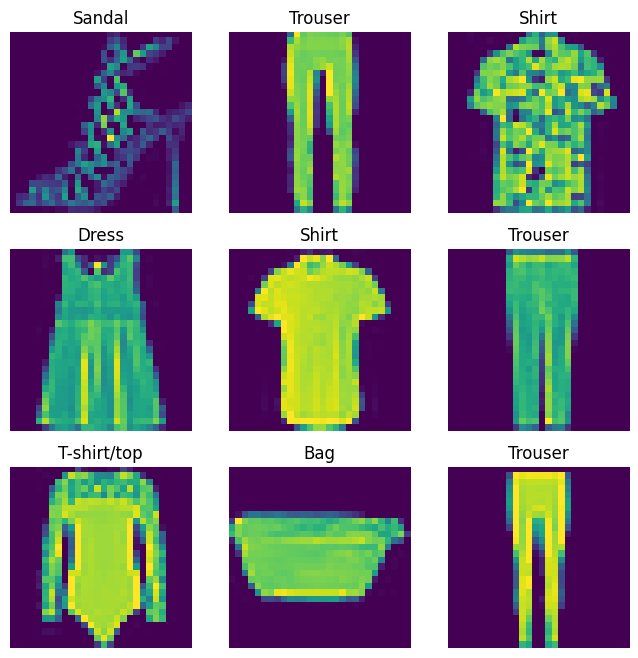

In [ ]:
# Lets get a visual of our dataset with 9 random images
import torch
import matplotlib.pyplot as plt


# Set up our plot
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(image_dataset), size=(1,)).item()
    img, label = image_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(index_to_class_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze())
plt.show()

# PyTorch DataLoaders
Now that we have a working dataset, lets begin defining how we are going to present or load our data to our model.

This is done using DataLoaders!

In [ ]:
# Import DataLoader
from torch.utils.data import DataLoader

In [ ]:
# Create a new dataloader from our image_dataset above
image_dataloader = DataLoader(dataset=image_dataset, batch_size=64, shuffle=True, num_workers=1)

### DataLoader Parameters review
batch_size: Number of samples (images) are loaded at a time.

shuffle: When True, images are randomized before sending to the model.

num_workers: Number of processes to use for loading data. 

In [40]:
# iterate through the image_dataloader
features, labels = next(iter(image_dataloader))
# Print the batch size and the number of labels
print(f"Features shape: {features.size()}")
print(f"Labels shape: {labels.size()}")

Features shape: torch.Size([64, 1, 28, 28])
Labels shape: torch.Size([64])


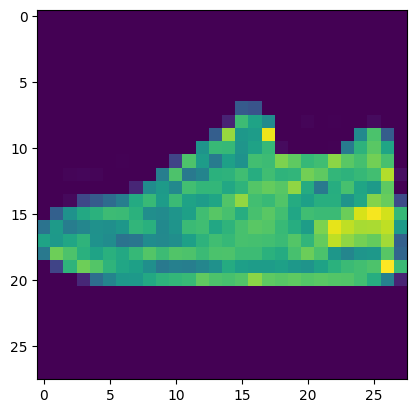

Label: 7 -> Sneaker


In [56]:
# Show image with its label from a random image in our batch
import random

# Get a random value between 0 and our batch size
rand_indx = random.randint(0, labels.size()[0])

# set image and label
img = features[rand_indx].squeeze()
label = labels[rand_indx]

# Plot the image
plt.imshow(img)
plt.show()

# Print its label and map its numeric value to the actual name of its class
print(f"Label: {label} -> {index_to_class_map[label.item()]}")

# Review
So far we have created Datasets using PyTorch's pre-loaded datasets.

We have also created a DataLoader used to define our to present our dataset to our model.

# Custom Datasets
Lets take a look at how to create custom datasets in Pytorch using our own existing images.

In [42]:
# Import Dataset
from torch.utils.data import Dataset

In [43]:
import pandas as pd
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset


# Define our Dataset Class
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, class_list):
        self.df = pd.read_csv(annotations_file)
        self.class_list = class_list

    def __len__(self):
        return self.df.shape[0]

    def __getitem__(self, index):
        image = Image.open(self.df.file_path[index])
        img_url = self.df.file_path[index]
        # Images must be tensors. Ignore transformations for now.
        convert_tensor = transforms.ToTensor()
        image = convert_tensor(image)
        label = self.class_list.index(self.df.label[index])

        return image, label, img_url

In [44]:
"""
Dataset Class Review

__init__ method: Peforms initial setup and load the data. 

__len__ method: Returns the number of samples for batch.

__getitem__ method: Retrieves a single data sample based on an index.

"""

'\nDataset Class Review\n\n__init__ method: Peforms initial setup and load the data. \n\n__len__ method: Returns the number of samples for batch.\n\n__getitem__ method: Retrieves a single data sample based on an index.\n\n'

In [45]:
# Lets create our custom dataset!
# We must define an annotations file and a list of classes
class_list = ["cat", "dog"]

In [46]:
# Create custom dataset
custom_dataset = CustomImageDataset(annotations_file='labels.csv', class_list=class_list)
print(custom_dataset)

In [47]:
# Print attributes of our dataset (__init__ method)

# Display our annotations
print(f"Annotations data: \n{custom_dataset.df}") 

Annotations data: 
              file_path label
0  images/cat/cat-1.jpg   cat
1  images/cat/cat-2.jpg   cat
2  images/cat/cat-3.jpg   cat
3  images/cat/cat-4.jpg   cat
4  images/cat/cat-5.jpg   cat
5  images/dog/dog-1.jpg   dog
6  images/dog/dog-2.jpg   dog
7  images/dog/dog-3.jpg   dog
8  images/dog/dog-4.jpg   dog
9  images/dog/dog-5.jpg   dog


In [48]:
# Show our classes
print(f"Classes: {custom_dataset.class_list}")

Classes: ['cat', 'dog']


In [49]:
# Show our class to index map
print(f"Mapped Classes: {custom_dataset.class_to_idx}")

AttributeError: 'CustomImageDataset' object has no attribute 'class_to_idx'

In [66]:
# Create our own mapper OR we could add this in our __getitem__ method
custom_class_labels_map = {0: 'cat', 1: 'dog'}

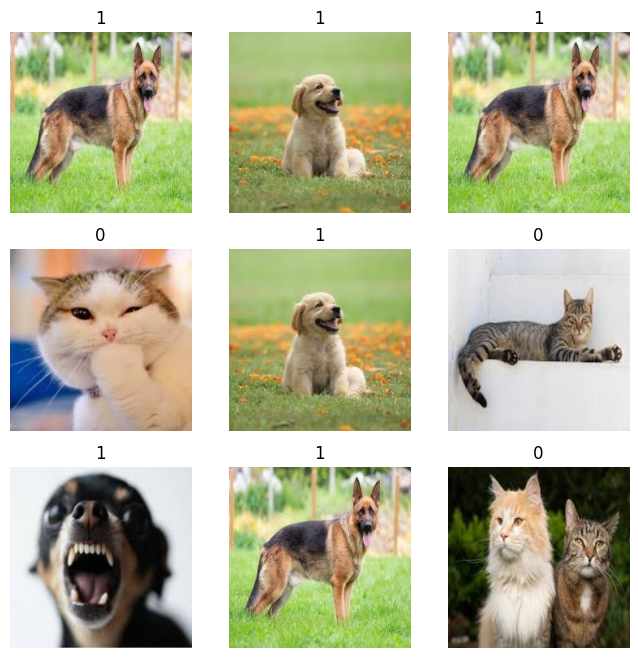

In [60]:
# Lets get a visual of our dataset with 9 random images
import torch
import matplotlib.pyplot as plt
from PIL import Image


# Set up our plot
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(custom_dataset), size=(1,)).item()
    img, label = custom_dataset[sample_idx][2], custom_dataset[sample_idx][1]
    img = Image.open(img)
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img)
plt.show()

In [62]:
# Create a DataLoader for our custom dataset
custom_dataloader = DataLoader(dataset=custom_dataset, batch_size=64, shuffle=True)

In [63]:
# Iterate through this dataloader like we did above
features, labels, urls = next(iter(custom_dataloader))
# Print the batch size and the number of labels
print(f"Features shape: {features.size()}")
print(f"Labels shape: {labels.size()}")

Features shape: torch.Size([10, 3, 224, 224])
Labels shape: torch.Size([10])


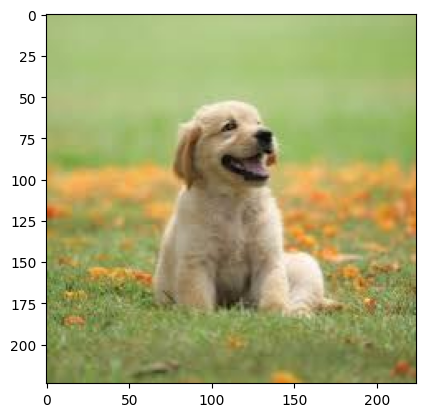

Label: 1 -> dog


In [70]:
# Show image with its label from a random image in our batch
import random

# Get a random value between 0 and our batch size
rand_indx = random.randint(0, labels.size()[0])

# set image and label
img = urls[rand_indx]
label = labels[rand_indx]

# Plot the image
img = Image.open(img)
plt.imshow(img)
plt.show()

# Print its label and map its numeric value to the actual name of its class
print(f"Label: {label} -> {custom_class_labels_map.get(label.item())}")

# Torchvision ImageFolder
Create a dataset using the folder structure as a way to label your images.

This utility simplifies the process of loading datasets where images are organized in a directory structure.

Example:
```bash
images/
    ├── cat/
    │   ├── cat1.jpg
    │   ├── cat2.jpg
    ├── dog/
    │   ├── dog1.jpg
    │   └── dog2.jpg
```

Each image will be labled by its directory.


In [ ]:
# Import torchvision
import torchvision

In [71]:
# Create a dataset using ImageFolder 
image_folder_dataset = torchvision.datasets.ImageFolder(
    root="images", # images directory
    transform=transforms.Compose([transforms.ToTensor()])) # Ignore this for now
print(image_folder_dataset)

Dataset ImageFolder
    Number of datapoints: 10
    Root location: images
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [72]:
# Let's print the Classes of a dataset 
print(image_folder_dataset.classes)

['cat', 'dog']


In [73]:
# Print the classes to their indexes 
print(image_folder_dataset.class_to_idx)

{'cat': 0, 'dog': 1}


In [74]:
# Load into dataloader
image_folder_dataloader = DataLoader(image_folder_dataset, batch_size=64, shuffle=True)

In [75]:
# Retrieve one batch of images and labels
images, labels = next(iter(image_folder_dataloader))


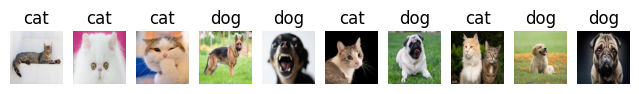

In [76]:
# Plot the batch above
fig, axes = plt.subplots(1, len(images), figsize=(8, 8))

for i, (img, label) in enumerate(zip(images, labels)):
    img = img.permute(1, 2, 0) # Ignore this
    axes[i].imshow(img)
    axes[i].set_title(image_folder_dataset.classes[label])
    axes[i].axis("off")
plt.show()